In [ ]:
import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
# Задание 1
# Импортируйте библиотеки pandas и numpy.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
# Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
# Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
# Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [ ]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
data = boston["data"]

data.shape

(506, 13)

In [ ]:
feature_names = boston["feature_names"]

feature_names.shape

(13,)

In [ ]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
target = boston["target"]

target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [ ]:
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [ ]:
def reduce_mem_usage(X):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = X.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in X.columns:
        col_type = X[col].dtype
        
        if col_type != object:
            c_min = X[col].min()
            c_max = X[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    X[col] = X[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    X[col] = X[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    X[col] = X[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    X[col] = X[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    X[col] = X[col].astype(np.float32)
                else:
                    X[col] = X[col].astype(np.float64)
        else:
            X[col] = X[col].astype('category')

    end_mem = X.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return X
  

In [ ]:
X = reduce_mem_usage(X)

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.03 MB
Decreased by 49.9%


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
dtypes: float32(13)
memory usage: 25.8 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

In [ ]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648968
274,32.4,36.495007
491,13.6,15.411242
72,22.8,25.403122
452,16.1,18.855324
76,20.0,23.146690
316,17.8,17.392132
140,14.0,14.078630
471,19.6,23.036983
500,16.8,20.599442


In [ ]:
#estimation of the model accuracy

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
 r2first = r2_score(y_test, y_pred)
 r2first

0.711225920995032

In [ ]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469886,11.403955,11.133050,0.073446,0.557259,6.325675,68.799736,3.765875,9.437853,407.042358,18.277987,359.701660,12.421127
std,8.315830,22.608419,6.938647,0.261236,0.116792,0.719211,27.665361,2.126031,8.639976,166.522156,2.256791,86.924812,7.112401
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782501,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.349998,3.107300,5.000000,330.000000,18.600000,391.600006,10.925000
75%,3.281687,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200001,396.172493,16.224999
max,88.976196,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

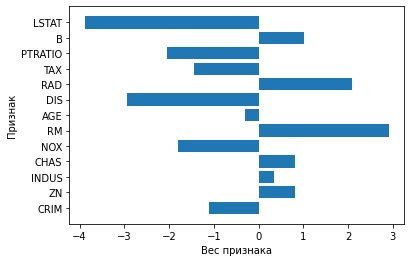

In [ ]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [ ]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [ ]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)

y_pred1 = lr.predict(X_test_scaled.loc[:, important_features])

r2second = r2_score(y_test, y_pred1)
print("r2 до: {}".format(r2first))
print("r2 после: {}".format(r2second))

r2 до: 0.711225920995032
r2 после: 0.6799128083897918


In [ ]:
# Задание 2
# Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
# Сделайте агрумент n_estimators равным 1000,
# max_depth должен быть равен 12 и random_state сделайте равным 42.
# Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
# но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
# чтобы получить из датафрейма одномерный массив Numpy,
# так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
# Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
# Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# ValueError: Unknown label type: 'continuous'
y_train = y_train.values[:, 0]
y_train

array([28.7, 21.2, 19.3, 23.1, 19.1, 25. , 33.4,  5. , 29.6, 18.7, 21.7,
       23.1, 22.8, 21. , 48.8, 14.6, 16.6, 27.1, 20.1, 19.8, 21. , 41.3,
       23.2, 20.4, 18.5, 29.4, 36.4, 24.4, 11.8, 13.8, 12.3, 17.8, 33.1,
       26.7, 13.4, 14.4, 50. , 22. , 19.9, 23.8, 17.5, 12.7,  5.6, 31.1,
       26.2, 19.4, 16.7, 13.8, 22.9, 15.3, 27.5, 36.1, 22.9, 24.5, 25. ,
       50. , 34.9, 31.7, 24.1, 22.1, 14.1, 42.8, 19.3, 32.2, 26.4, 21.8,
       21.7,  8.3, 46.7, 43.1, 31.5, 10.5, 16.7, 20. , 33.3, 17.8, 50. ,
       20.5, 23.2, 13.1, 19.6, 22.8, 28.7, 30.7, 22.9, 21.9, 23.9, 32.7,
       24.3, 21.5, 24.6,  8.5, 26.4, 23.1, 15. ,  8.8, 19.3, 23.9, 24.7,
       19.8, 23.8, 13.3, 29. , 27.1, 34.6, 13.3, 15.6, 12.5, 14.6, 11. ,
       24.8, 17.3,  8.1, 21.4, 15.6, 23.3, 32. , 38.7, 30.1, 20.5, 32.5,
       42.3, 24.3, 20.6, 22. , 18.2, 15. ,  6.3, 20.1, 21.4, 28.4, 30.1,
       20.8, 23. , 14.3, 11.7, 37.3, 17.1, 10.4, 23. , 22.7, 20.3, 21.7,
       50. ,  8.4, 18.8, 37.2, 16.1, 16.5, 22.2, 20

In [ ]:
y_train = y_train.astype(int)
y_train

array([28, 21, 19, 23, 19, 25, 33,  5, 29, 18, 21, 23, 22, 21, 48, 14, 16,
       27, 20, 19, 21, 41, 23, 20, 18, 29, 36, 24, 11, 13, 12, 17, 33, 26,
       13, 14, 50, 22, 19, 23, 17, 12,  5, 31, 26, 19, 16, 13, 22, 15, 27,
       36, 22, 24, 25, 50, 34, 31, 24, 22, 14, 42, 19, 32, 26, 21, 21,  8,
       46, 43, 31, 10, 16, 20, 33, 17, 50, 20, 23, 13, 19, 22, 28, 30, 22,
       21, 23, 32, 24, 21, 24,  8, 26, 23, 15,  8, 19, 23, 24, 19, 23, 13,
       29, 27, 34, 13, 15, 12, 14, 11, 24, 17,  8, 21, 15, 23, 32, 38, 30,
       20, 32, 42, 24, 20, 22, 18, 15,  6, 20, 21, 28, 30, 20, 23, 14, 11,
       37, 17, 10, 23, 22, 20, 21, 50,  8, 18, 37, 16, 16, 22, 20, 13, 48,
       23, 22, 17, 30, 36, 41, 18, 22, 18, 44, 11, 18, 16, 22,  7, 20, 13,
       13, 18, 23, 21, 23, 23, 50, 26, 22, 50,  8, 23, 21, 18, 18, 17, 13,
       12, 26, 21, 28, 20, 22, 13, 11, 29, 26, 10, 23, 24, 46, 21,  7, 36,
       44, 17, 27, 37, 14, 28, 10, 19, 43, 27, 25, 16, 16, 13, 50, 22, 32,
       15, 14, 13, 24, 33

In [ ]:
model = RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([22, 32, 15, 23, 14, 20, 19, 13, 21, 21, 23, 16,  8, 21, 22, 25, 20,
        7, 50, 15, 23, 22, 13, 22, 16, 14, 21, 13, 22, 19, 19, 23, 13, 21,
       13, 15, 33, 18, 20, 24, 23, 33, 50, 22, 22, 12, 13, 24, 19, 23, 22,
       33, 19, 27, 50, 21, 15, 37, 22, 20, 22, 32, 24, 16, 18, 14, 12, 23,
       34, 14, 19, 25,  8, 18, 21,  5, 19, 50,  7,  8, 22, 13, 22, 11, 21,
       25, 14, 23, 23, 18, 22,  8, 19, 17, 21, 18, 50,  7, 13,  7, 22, 24,
       13, 20, 23, 11, 20, 23, 19, 22,  8, 14, 22, 22, 31, 13, 50, 14, 21,
       23, 20, 24,  5, 21, 24, 23, 24, 37, 13, 46, 17, 19, 19, 18, 15, 23,
       19, 30, 31, 19, 19, 23, 22, 22,  8, 22, 21, 14, 13, 44, 14, 14])

In [ ]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,22
274,32.4,32
491,13.6,15
72,22.8,23
452,16.1,14
76,20.0,20
316,17.8,19
140,14.0,13
471,19.6,21
500,16.8,21


In [ ]:
r2third = r2_score(y_test, y_pred)
r2third

0.8370756186213897

In [ ]:
print("r2 до: {}".format(r2first))
print("r2 после: {}".format(r2second))
print("r3 RandomForestClassifier: {}".format(r2third))

r2 до: 0.711225920995032
r2 после: 0.6799128083897918
r3 RandomForestClassifier: 0.8370756186213897


In [ ]:
# RandomForestClassifier model shows better accuracy (about 12%) in spite of having a necessary change in input data from float to int due to # ValueError: Unknown label type: 'continuous', 
# in comparison to the unscalable linear regression model. However, the linear regression model shows after scaling features even lower accuracy for some reason.

In [ ]:
# *Задание 3
# Вызовите документацию для класса RandomForestRegressor,
# найдите информацию об атрибуте feature_importances_.
# С помощью этого атрибута найдите сумму всех показателей важности,
# установите, какие два признака показывают наибольшую важность.

In [ ]:
RandomForestClassifier??

In [ ]:
modelfi = model.feature_importances_
modelfi.shape

(13,)

In [ ]:
modelfis = np.sum(modelfi)
modelfis


1.0

In [ ]:
X_train.shape

(354, 13)

In [ ]:
modelfis = pd.DataFrame(modelfi)
modelfis.rename( columns={0 :'feature_importances, %'}, inplace=True)
modelfis

,"feature_importances, %"
0,0.115472
1,0.021473
2,0.049592
3,0.009745
4,0.072786
5,0.137637
6,0.108621
7,0.109380
8,0.032542
9,0.049919


In [ ]:
X_traincolumns = X_train.columns
X_traincolumns = pd.DataFrame(X_traincolumns)
X_traincolumns.rename( columns={0 :'feature_names'}, inplace=True)
X_traincolumns

,feature_names
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [ ]:
result = pd.concat([X_traincolumns, modelfis], axis=1)
result['feature_importances, %'] = 100 * result['feature_importances, %'].round(4) 
result = result.sort_values(by=['feature_importances, %'], ascending=False)
result

,feature_names,"feature_importances, %"
12,LSTAT,14.27
5,RM,13.76
0,CRIM,11.55
7,DIS,10.94
6,AGE,10.86
11,B,9.80
4,NOX,7.28
10,PTRATIO,5.22
9,TAX,4.99
2,INDUS,4.96


In [ ]:
# The two most valuable features to estimate the target price of property are 
# LSTAT  - % lower status of the population and RM - the average number of rooms per dwelling;